In [1]:
import keras

In [2]:
#importing dataset directly from keras datasets available
#otherwise you can download it from kaggle you will be able to see it in excel if format of matrix
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

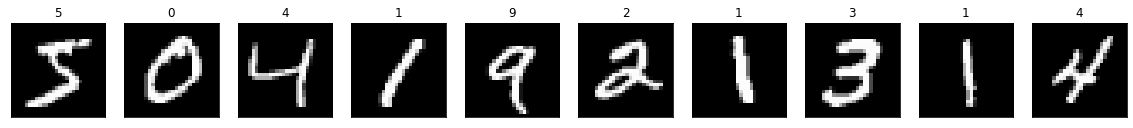

In [8]:
#visualization of first 10 images with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])  # these are functions of matplotlib.axes (for each subplot you can have different features)
    axes[i].imshow(x_train[i], cmap='gray') # imshow shows images in true form if you direcly write train[i] it will show you matrix)
    axes[i].get_xaxis().set_visible(False) 
    axes[i].get_yaxis().set_visible(False)
plt.show()

You can see images with their labels on top which are already provided

In [9]:
#converting labels into one hot encoded values (this is required for applying ANN as their are more than 2 class not required for binary classification)
from keras.utils import to_categorical
import numpy as np
temp = []
for i in range(len(y_train)):
               temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):
               temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

as you can see y_train and y_test were only one column each which are now being converted into 10 column one for each number from 0-9

In [12]:
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [13]:
#Model Initiation
model=Sequential()
#As input is in format of 2D array and Converting them into 1D
model.add(Flatten(input_shape=(28,28)))
#number of neurons and activation function are hyperparameters you can choose whichever can give you optimal solution
model.add(Dense(16,activation="sigmoid"))
#activation function is softmax as our output is multiclass not binary
model.add(Dense(10,activation="softmax"))

In [14]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


model summary shows us there are 3 layers input,hidden and output with total of 12730 parameters in total to optimise.
<br>
Which are 784 inputs* each going into 16 neurons(16 weights for each)=12544+16 bias(1 for each neuron)=12560
<br>
Similarly for ouput layer (16*10)+10=170.

In [15]:
# Model Compilation
# As we are using NN for classification we have to use loss function as cross entropy. optimizer and metrics can be of your choice
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [16]:
# Model Training
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1115 - acc: 0.7077 - val_loss: 0.6931 - val_acc: 0.8145
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6097 - acc: 0.8265 - val_loss: 0.5164 - val_acc: 0.8554
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5368 - acc: 0.8377 - val_loss: 0.4937 - val_acc: 0.8523
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4810 - acc: 0.8546 - val_loss: 0.5014 - val_acc: 0.8563
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4641 - acc: 0.8612 - val_loss: 0.4572 - val_acc: 0.8619
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4578 - acc: 0.8635 - val_loss: 0.4875 - val_acc: 0.8494
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4286 - acc: 0.8727 - val_loss: 0.4052 - val_acc: 0.8788
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

Here you can see the results as accuracy is near about 87%.
<br>
You can check for different number of nwurons activation function.
<br>
also you can try different number of epochs and different batch sizes which might improve results.

In [17]:
prediction=model.predict(x_test)

In [18]:
prediction

array([[1.6081825e-05, 2.4948397e-04, 6.2556202e-05, ..., 9.9233621e-01,
        2.3441868e-05, 5.5625741e-03],
       [6.0340855e-03, 5.0009059e-04, 9.8007166e-01, ..., 4.5301258e-05,
        3.1605735e-03, 2.6560117e-05],
       [3.5986070e-06, 9.9782121e-01, 7.1160110e-05, ..., 3.8755164e-04,
        3.6923328e-04, 5.3344743e-04],
       ...,
       [1.9423906e-06, 3.2313925e-05, 1.6440581e-04, ..., 1.3243480e-02,
        8.6151238e-04, 8.0294326e-02],
       [4.0881508e-03, 5.9575350e-03, 1.6756829e-04, ..., 4.1881666e-04,
        1.6372588e-01, 9.7170688e-04],
       [1.7197020e-04, 1.6036074e-05, 1.1155813e-02, ..., 6.0986986e-06,
        1.6385429e-04, 3.8499114e-05]], dtype=float32)

In [21]:
# Argmax returns the indices of the maximum values along an axis which in our case are nothing but number between 0 to 9 with highest probability predicted by ANN
pred=np.argmax(prediction,axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

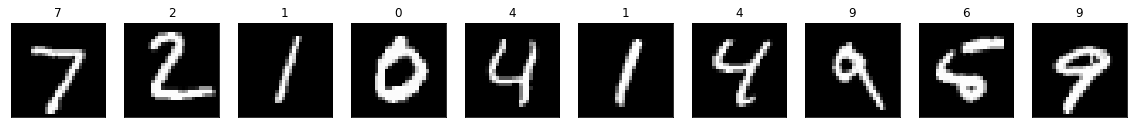

In [23]:
# Visualization of test images with predicted outcomes
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(pred[i])
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()